<a href="https://colab.research.google.com/github/Slimani-CE/AI-Python-Implemention/blob/main/King%20County%20Housing%20Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21611.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.40,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.13,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


## Dataset shape

In [4]:
dataset.shape

(21613, 21)

## Drop the id and date columns

In [5]:
dataset.drop(columns = ['id', 'date'], inplace = True)

## Data types

In [6]:
dataset.dtypes.to_frame().T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,float64,int64,float64,int64,int64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,float64,float64,int64,int64


## Dealing with missing values

*  Display features containing missing values

In [7]:
na_count = dataset.isna().sum().to_frame()
na_count.columns = ['num_missing']
na_count[na_count['num_missing'] != 0]

,num_missing
sqft_above,2


> The 'sqft_above' feature contains 2 missing values. regarding the length of our dataset; replacing these missing values with the mean value will not affect our model

*  Replacing the missing values with the mean value

In [8]:
dataset['sqft_above'].fillna(value = dataset['sqft_above'].mean(), inplace = True)

## Specify target and features

In [9]:
target = 'price'
features  = dataset.columns.tolist()
features.remove(target)

In [10]:
target

'price'

In [11]:
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

## # Correlations with target variable

In [12]:
# Display features with target
correlations = dataset.corr()
correlations[target].to_frame().T

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.0,0.30835,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605565,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447


In [13]:
# Display features with correlation < 0.2
cor_target = abs(correlations[target])
removed_features = cor_target[cor_target < 0.2]
print(removed_features)
removed_features = removed_features.index.to_list()

sqft_lot        0.089661
condition       0.036362
yr_built        0.054012
yr_renovated    0.126434
zipcode         0.053203
long            0.021626
sqft_lot15      0.082447
Name: price, dtype: float64


## Drop features with correlation < 0.2


In [14]:
dataset.drop(columns = removed_features, inplace = True)

## Plot correlation heatmap

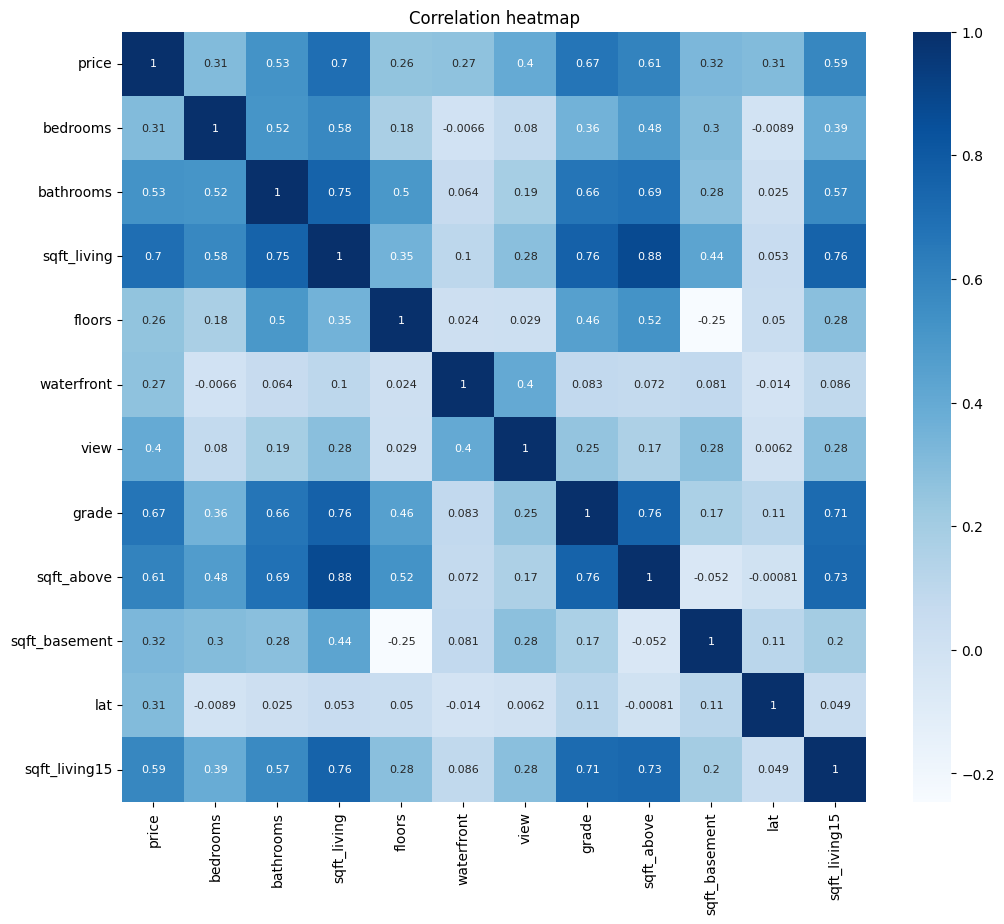

In [15]:
plt.figure(figsize=(12, 10))
new_correlations = dataset.corr()
sns.heatmap(new_correlations, annot=True, cmap='Blues', annot_kws={'size': 8})
plt.title('Correlation heatmap')
plt.show()

## Determine the highest intercorrelations

In [16]:
highly_correlated_features = new_correlations[new_correlations > 0.75]
highly_correlated_features.fillna('-')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.0,-,-,-,-,-,-,-,-,-,-,-
bedrooms,-,1.0,-,-,-,-,-,-,-,-,-,-
bathrooms,-,-,1.0,0.754665,-,-,-,-,-,-,-,-
sqft_living,-,-,0.754665,1.0,-,-,-,0.762704,0.876586,-,-,0.75642
floors,-,-,-,-,1.0,-,-,-,-,-,-,-
waterfront,-,-,-,-,-,1.0,-,-,-,-,-,-
view,-,-,-,-,-,-,1.0,-,-,-,-,-
grade,-,-,-,0.762704,-,-,-,1.0,0.755917,-,-,-
sqft_above,-,-,-,0.876586,-,-,-,0.755917,1.0,-,-,-
sqft_basement,-,-,-,-,-,-,-,-,-,1.0,-,-


## Remove features which are highly correlated with "sqft_living"

In [17]:
dataset.drop(columns = ['sqft_above', 'sqft_living15'], inplace = True)

>Update features list

In [18]:
features = dataset.columns.tolist()
features.remove(target)
len_features = len(features)
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'grade',
 'sqft_basement',
 'lat']

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset[features].values, dataset[target].values, test_size = 0.2, random_state = 42)

In [27]:
dataset[features]

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,3,2.25,2570,2.0,0,0,7,400,47.7210
2,2,1.00,770,1.0,0,0,6,0,47.7379
3,4,3.00,1960,1.0,0,0,7,910,47.5208
4,3,2.00,1680,1.0,0,0,8,0,47.6168
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,0,47.6993
21609,4,2.50,2310,2.0,0,0,8,0,47.5107
21610,2,0.75,1020,2.0,0,0,7,0,47.5944
21611,3,2.50,1600,2.0,0,0,8,0,47.5345


## Normalize the features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training the Multiple Linear Regression model on the Training set

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [34]:
y_pred = model.predict(X_test)
np.set_printoptions(edgeitems = 10, precision = 2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[ 432949.83  365000.  ]
 [ 760170.3   865000.  ]
 [1228789.3  1038000.  ]
 [1577646.37 1490000.  ]
 [ 782780.84  711000.  ]
 [ 268128.79  211000.  ]
 [ 782735.83  790000.  ]
 [ 501947.63  680000.  ]
 [ 429157.04  384500.  ]
 [ 336659.13  605000.  ]
 ...
 [ 325301.75  322000.  ]
 [ 264387.25  199000.  ]
 [ 465784.54  615000.  ]
 [  96364.61  265000.  ]
 [1555501.18 1190000.  ]
 [ 464737.6   338000.  ]
 [ 686831.83  673000.  ]
 [ 402258.62  285000.  ]
 [ 602492.43  605000.  ]
 [ 424456.73  356500.  ]]


## Evaluating the model

In [35]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [36]:
coef_determination(y_test, y_pred)

0.6614280397976285

# Training the Polynomial Regression model on the Training set

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(X_train)
X_train_poly = poly_transformer.transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [44]:
y_pred = model.predict(X_test_poly)
np.set_printoptions(edgeitems = 10, precision = 2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[ 379189.98  365000.  ]
 [ 752473.51  865000.  ]
 [1263819.93 1038000.  ]
 [1580042.01 1490000.  ]
 [ 756727.88  711000.  ]
 [ 261180.07  211000.  ]
 [ 809943.12  790000.  ]
 [ 558764.49  680000.  ]
 [ 448614.71  384500.  ]
 [ 434943.92  605000.  ]
 ...
 [ 289542.17  322000.  ]
 [ 243933.56  199000.  ]
 [ 520860.26  615000.  ]
 [ 261982.6   265000.  ]
 [1626496.46 1190000.  ]
 [ 312911.91  338000.  ]
 [ 657098.47  673000.  ]
 [ 318157.11  285000.  ]
 [ 694713.25  605000.  ]
 [ 330197.69  356500.  ]]


## Evaluating the model

In [45]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [46]:
coef_determination(y_test, y_pred)

0.7161041194770521